In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(["science","grid"])

In [3]:
data1 = pd.read_feather("gamma345")
data2 = pd.read_feather("gamma7")
data3 = pd.read_feather("gamma10")
data4 = pd.read_feather("gamma14")
input_vars1 = pd.read_csv("input_parameters345.csv")
input_vars2 = pd.read_csv("input_parameters7.csv")
input_vars3 = pd.read_csv("input_parameters10.csv")
input_vars4 = pd.read_csv("input_parameters14.csv")
os = pd.read_csv("output_names.csv")

In [4]:
data2.o0 = data2.o0+48
data3.o0 = data3.o0+48+16
data4.o0 = data4.o0+48+16+11
data = pd.concat((data1,data2))
data = pd.concat((data,data3))
data = pd.concat((data,data4))

input_vars = pd.concat((input_vars1,input_vars2))
input_vars = pd.concat((input_vars,input_vars3))
input_vars = pd.concat((input_vars,input_vars4))
input_vars = input_vars.reset_index()

In [5]:
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm

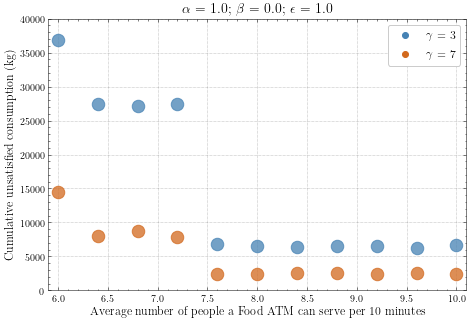

In [36]:
from matplotlib.lines import Line2D

# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['steelblue','chocolate','yellowgreen']

fig,ax = plt.subplots(1,1,figsize=(7.5,5))

input_vars_filtered = input_vars

cd = {}
labels = list()
gammas = [3,7,14]
for g in range(len(gammas)):
    cd[gammas[g]]=colors[g]
    labels.append(r"$\gamma$ = %s"%gammas[g])

for i in [6.0,6.4,6.8,7.2,7.6,8.0,8.4,8.8,9.2,9.6,10,10.4,10.8,11.2,11.4,11.8]:    

    for j in input_vars_filtered[input_vars_filtered.parallel_served_full==i].index:
        if input_vars_filtered.gamma[j]==3 or input_vars_filtered.gamma[j]==7:
            plt.plot( i, data.o1[data.o0==j].iloc[-1],marker='o',color=cd[input_vars_filtered.gamma[j]],markersize=12.5 ,alpha=.75)

            
lines = [Line2D([0], [0], color=c, linewidth=10,marker='o' ,linestyle='None') for c in colors]
        
plt.xlim([5.9,10.1])
plt.ylim([0,40000])
plt.ylabel("Cumulative unsatisfied consumption (kg)",fontsize=12)
plt.xlabel("Average number of people a Food ATM can serve per 10 minutes",fontsize=12)
plt.title(r"$\alpha$ = 1.0; $\beta$ = 0.0; $\epsilon$ = 1.0",fontsize=14)
plt.legend(lines[:2], labels[:2],fontsize=12)
plt.savefig("/home/daan/Desktop/sample_servicecapacity.png")